In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

ROLL_NUMBER =102303651

In [17]:
ar= 0.05* (ROLL_NUMBER % 7)
br= 0.3 *(ROLL_NUMBER % 5 +1)

print(f"Calculated Constants for Roll {ROLL_NUMBER}:")
print(f"ar= {ar}")
print(f"br ={br}")

Calculated Constants for Roll 102303651:
ar= 0.1
br =0.6


In [18]:
df = pd.read_csv('data.csv (1)/data.csv', encoding='latin1')

C:\Users\RAVISH SHARMA\AppData\Local\Temp\ipykernel_26504\3127444167.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv (1)/data.csv', encoding='latin1')


In [19]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [21]:
x= df['no2'].dropna().values

print(f"Loaded {len(x)} samples from 'no2' column.")

Loaded 419509 samples from 'no2' column.


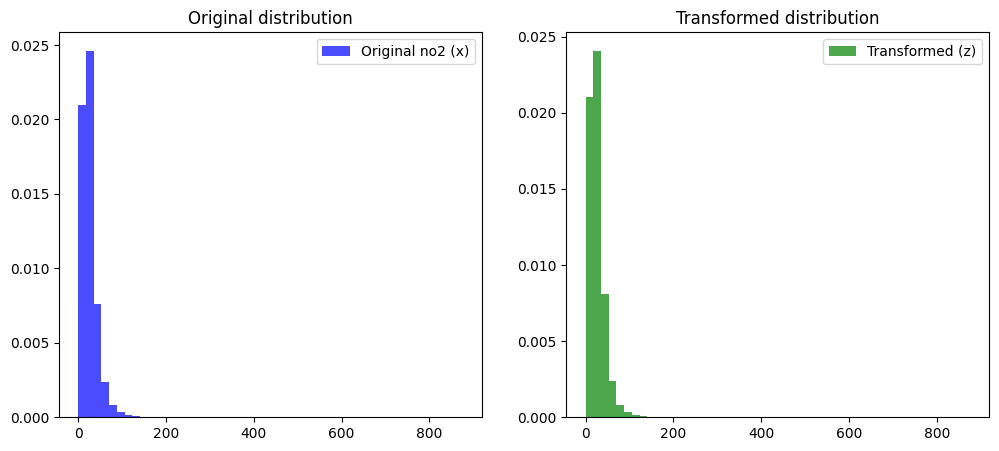

In [22]:
z = x +  ar* np.sin(br * x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(x, bins=50, density=True,  alpha=0.7, color='blue', label='Original no2 (x)')
plt.legend()
plt.title("Original distribution")

plt.subplot(1, 2, 2)
plt.hist(z, bins= 50, density =True, alpha= 0.7, color='green', label='Transformed (z)')
plt.legend()
plt.title("Transformed distribution")
plt.show()

In [23]:
def target_pdf(z, c, lam, mu):
    return c* np.exp(-lam*(z-mu)**2)

hist_vals, bin_edges =np.histogram(z, bins=100, density=True)
bin_centers =(bin_edges[:-1] + bin_edges[1:]) / 2

mu_guess =np.mean(z)
sigma_guess = np.std(z)
lam_guess = 1/ (2 *sigma_guess**2)
c_guess =np.max(hist_vals) 

p0 =[c_guess,lam_guess, mu_guess]

popt, pcov = curve_fit(target_pdf,bin_centers, hist_vals, p0 =p0, maxfev=5000)

c_est, lam_est, mu_est= popt

print("Estimated parameters:")
print(f"c      = {c_est:.6f}")
print(f"lambda = {lam_est:.6f}")
print(f"mu     = {mu_est:.6f}")

Estimated parameters:
c      = 0.031508
lambda = 0.003370
mu     = 19.849011
